In [112]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from matplotlib import pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
'''import warnings
warnings.filterwarnings("ignore")'''
init_notebook_mode(connected=True)

In [113]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:, 1:]

In [114]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [115]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [116]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [117]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [118]:
print(data['y'].value_counts())

0.0    100
1.0    100
Name: y, dtype: int64


In [119]:
print("Data is perfectly balanced")

Data is perfectly balanced


In [120]:
#import seaborn as sns
#sns.lmplot('f1', 'f2', data, hue='y', fit_reg=False)

# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

# Task1:

Accuracy of Logistic regression:  0.93
Feature: 1, Score: -0.00089
Feature: 2, Score: 0.00001
Feature: 3, Score: 1.95668


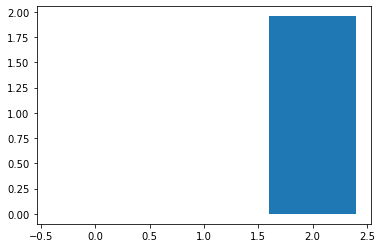

In [121]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# Logistic regression (logloss) for feature importance

# define the model
logistic_clf = LogisticRegression()

# fit the model
logistic_clf.fit(X, Y)

# accuracy of SGD_log_model
score = logistic_clf.score(X, Y)
print("Accuracy of Logistic regression: ", score)

# get importance
importance = logistic_clf.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy of SVM Linear Classfier:  0.53
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.00021
Feature: 3, Score: 0.10634


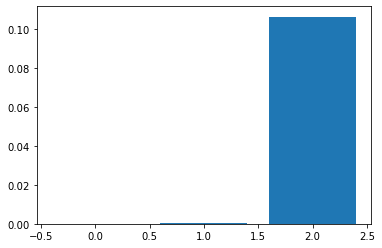

In [122]:
# SVM(SGD-Classifier with hinge) for feature importance

# define the model
svm_linear_clf = LinearSVC(loss='hinge', max_iter=10000)

# fit the model
svm_linear_clf.fit(X, Y)

# accuracy of Logistic Regression
score = svm_linear_clf.score(X,Y)
print('Accuracy of SVM Linear Classfier: ', score)

# get importance
importance = svm_linear_clf.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Observations:-
1. Logistic regression fits quite well on to data and accuracy is also good. <br>
2. SVM linear failed to converge even with more iteration than by default with hinge loss. <br>
3. The high variance nature of data is affecting the behavior of the classifier. <br>

# Task2:

In [123]:
# Scale the features to zero mean unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

Accuracy of Logistic Regression on Standardization data:  0.93
Feature: 1, Score: -0.24105
Feature: 2, Score: 0.07589
Feature: 3, Score: 3.90357


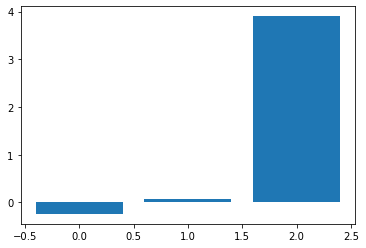

In [124]:
# Logistic Regression on Standardization data

# define the model
logistic_clf_standard = LogisticRegression()

# fit the model
logistic_clf_standard.fit(X, Y)

# accuracy of Logistic Regression
score_standard = logistic_clf_standard.score(X, Y)
print('Accuracy of Logistic Regression on Standardization data: ', score_standard)

# get importance
importance = logistic_clf_standard.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Accuracy of SVM Linear Classfier on Standardization of data:  0.925
Feature: 1, Score: -0.21613
Feature: 2, Score: 0.06622
Feature: 3, Score: 2.91877


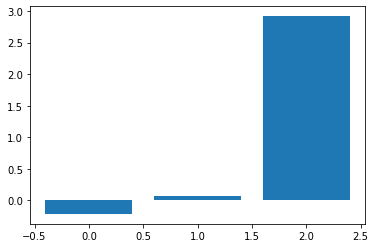

In [125]:
# SVM Classifier with hinge on Standardization data

# define the model
svm_linear_clf_standard = LinearSVC(loss='hinge', max_iter=100)

# fit the model
svm_linear_clf_standard.fit(X, Y)

# accuracy of Logistic Regression
score_standard = svm_linear_clf_standard.score(X,Y)
print('Accuracy of SVM Linear Classfier on Standardization of data: ', score_standard)

# get importance
importance = svm_linear_clf_standard.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Observations:-
1. Logistic regression fits quite well and accuracy is also good with standardized features. <br>
2. SVM linear converge within 100 iterations with hinge loss. <br>
3. After Standardization SVM Linear model converged very fast and accuracy is also increased to 0.92 <br>

#### Over-All Observations:-
1. Logistic regression model fits quite well and accuracy is also good with the standardized features or without standardization,
<br>features importance is also intact for logistic regression. <br>
2. SVM linear model seems highly sensitive to variance of features in the dataset, standardization
helps to overcome the high variance nature of the dataset, and helps to improve the classifier. <br>
3. For SVM, the feature importance has changed after standardization from (f3 > f2 > f1) to (f3 > f1 > f2)